<a href="https://colab.research.google.com/github/charles14525/Emerging-technology-2/blob/main/Assignment_10_2_ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
warnings.filterwarnings("ignore")

In [5]:
print(df.head())

     Month  CO2 (ppm)
0  1965-01     319.32
1  1965-02     320.36
2  1965-03     320.82
3  1965-04     322.06
4  1965-05     322.17


In [24]:
df = pd.read_csv("data.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df = df.asfreq('MS')  # Monthly Start frequency
df.columns = ['CO2']

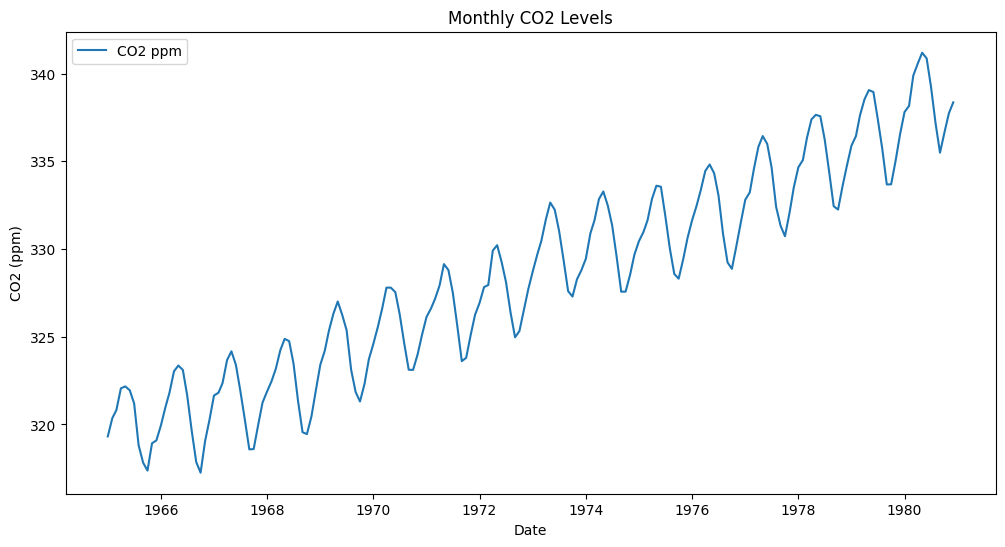

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df, label='CO2 ppm')
plt.title('Monthly CO2 Levels')
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.show()

In [26]:
model_111 = ARIMA(df, order=(1, 1, 1))
model_111_fit = model_111.fit()
print("\n--- ARIMA(1,1,1) Summary ---\n")
print(model_111_fit.summary())


--- ARIMA(1,1,1) Summary ---

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Wed, 23 Apr 2025   AIC                            457.638
Time:                        16:08:17   BIC                            467.395
Sample:                    01-01-1965   HQIC                           461.590
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202

In [28]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
best_aic = float('inf')
best_order = None
best_model = None

In [29]:
print("\n--- Grid Search ---")
for order in pdq:
    try:
        model = ARIMA(df, order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results
        print(f"ARIMA{order} - AIC:{results.aic:.2f}")
    except:
        continue

print(f"\nBest ARIMA model: ARIMA{best_order} with AIC = {best_aic:.2f}")



--- Grid Search ---
ARIMA(0, 0, 0) - AIC:1233.51
ARIMA(0, 0, 1) - AIC:987.92
ARIMA(0, 0, 2) - AIC:791.41
ARIMA(0, 1, 0) - AIC:599.63
ARIMA(0, 1, 1) - AIC:492.97
ARIMA(0, 1, 2) - AIC:445.85
ARIMA(0, 2, 0) - AIC:503.60
ARIMA(0, 2, 1) - AIC:495.89
ARIMA(0, 2, 2) - AIC:492.02
ARIMA(1, 0, 0) - AIC:609.53
ARIMA(1, 0, 1) - AIC:502.18
ARIMA(1, 0, 2) - AIC:453.53
ARIMA(1, 1, 0) - AIC:476.74
ARIMA(1, 1, 1) - AIC:457.64
ARIMA(1, 1, 2) - AIC:438.32
ARIMA(1, 2, 0) - AIC:495.25
ARIMA(1, 2, 1) - AIC:497.10
ARIMA(1, 2, 2) - AIC:460.89
ARIMA(2, 0, 0) - AIC:479.11
ARIMA(2, 0, 1) - AIC:462.24
ARIMA(2, 0, 2) - AIC:442.79
ARIMA(2, 1, 0) - AIC:435.25
ARIMA(2, 1, 1) - AIC:389.30
ARIMA(2, 1, 2) - AIC:390.87
ARIMA(2, 2, 0) - AIC:496.67
ARIMA(2, 2, 1) - AIC:438.93
ARIMA(2, 2, 2) - AIC:439.14

Best ARIMA model: ARIMA(2, 1, 1) with AIC = 389.30


In [30]:
print("\n--- Best ARIMA Model Summary ---\n")
print(best_model.summary())


--- Best ARIMA Model Summary ---

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  192
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -190.652
Date:                Wed, 23 Apr 2025   AIC                            389.305
Time:                        16:08:55   BIC                            402.314
Sample:                    01-01-1965   HQIC                           394.574
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5236      0.047     32.128      0.000       1.431       1.617
ar.L2         -0.8195      0.051    -16.209      0.000      -0.919      -0.720
ma.L1         -0.

In [31]:
forecast_steps = 10
forecast = best_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()


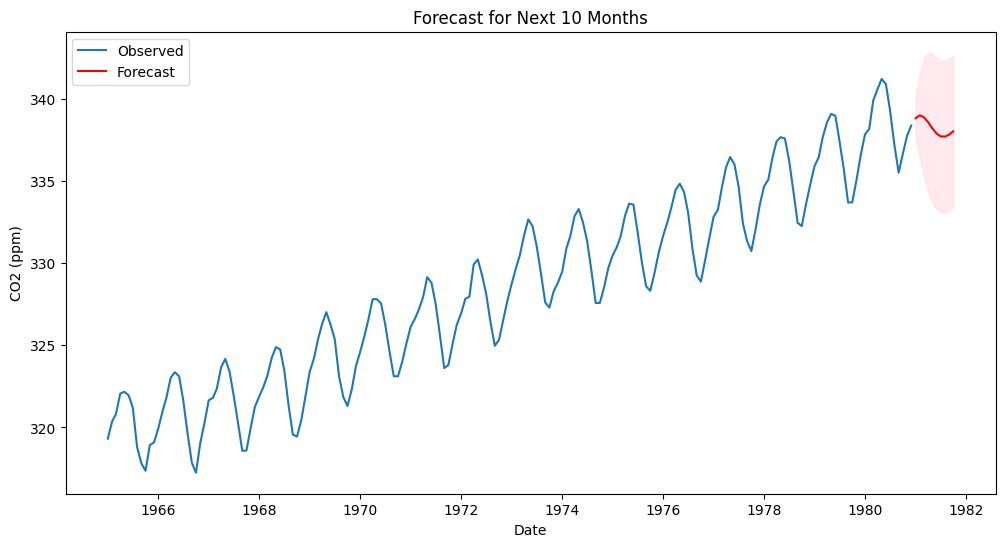

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df, label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title(f'Forecast for Next {forecast_steps} Months')
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.show()